Largest contour is 8 with 1859 points


/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:63: RankWarning: Polyfit may be poorly conditioned
  coeffs_x = np.polyfit(t, x_vals, deg=degree)
/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:64: RankWarning: Polyfit may be poorly conditioned
  coeffs_y = np.polyfit(t, y_vals, deg=degree)
/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:63: RankWarning: Polyfit may be poorly conditioned
  coeffs_x = np.polyfit(t, x_vals, deg=degree)
/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:64: RankWarning: Polyfit may be poorly conditioned
  coeffs_y = np.polyfit(t, y_vals, deg=degree)
/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:63: RankWarning: Polyfit may be poorly conditioned
  coeffs_x = np.polyfit(t, x_vals, deg=degree)
/var/folders/s8/zg26d9qn0js_ps2h7gd_yfdc0000gn/T/ipykernel_30951/3274586910.py:64: RankWarning: Polyfit may be poor

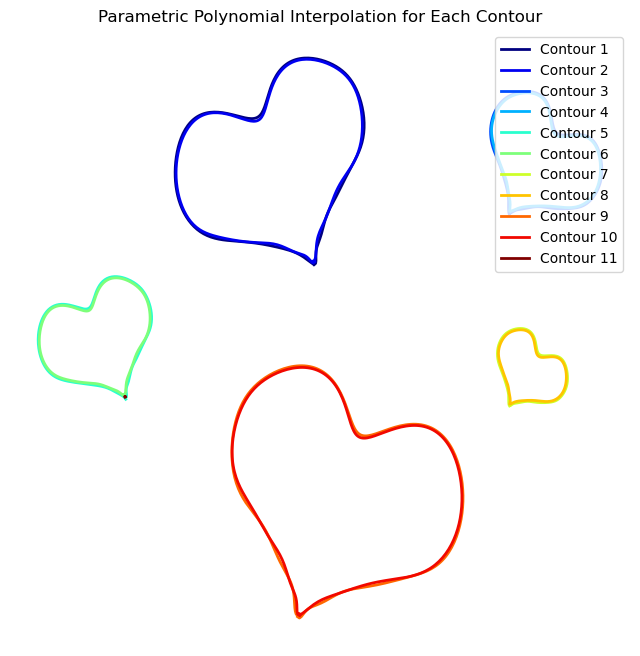

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import io, color, filters
from scipy.interpolate import splprep, splev

image = io.imread("image.jpeg")  # Replace with your image filename

# 2. Convert to grayscale
#    If there's an alpha channel, take only the first 3 channels (RGB).
if image.shape[-1] == 4:
    image = image[..., :3]  # discard alpha
gray = color.rgb2gray(image)

# 3. Apply Sobel filter to get gradient magnitude
edge_sobel = filters.sobel(gray)

# 4. Threshold the gradient magnitude to isolate edges
#    Adjust threshold as needed based on your image.
threshold = 0.2
edges = edge_sobel > threshold

# Suppose 'edges' is the binary array from the previous code snippet.
# 1. Find all contours
contours = measure.find_contours(edges, level=0.5)

# Set the desired polynomial degree for interpolation.
# Note: For a contour with too few points, we use a lower degree.
desired_degree = 30

# Prepare a plot with the original image as background.
fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(image)
ax.invert_yaxis()
ax.set_title("Parametric Polynomial Interpolation for Each Contour")

# Use a colormap to assign different colors to each contour.
colors = plt.cm.jet(np.linspace(0, 1, len(contours)))

largest_countour_idx = 0
largest_countour_cnt = -1
for i, contour in enumerate(contours):
    # Each contour is an Nx2 array of [y, x] coordinates.
    n_points = contour.shape[0]
    if n_points < 2:
        continue  # Skip if too few points.

    if n_points > largest_countour_cnt:
        largest_countour_cnt = n_points
        largest_countour_idx = i

    # Separate x and y values.
    y_vals = contour[:, 0]
    x_vals = contour[:, 1]

    # Define the parameter t as the index of each point.
    t = np.arange(n_points)

    # Adjust degree if not enough points.
    degree = min(desired_degree, n_points - 1)

    # Fit polynomials for x(t) and y(t)
    coeffs_x = np.polyfit(t, x_vals, deg=degree)
    coeffs_y = np.polyfit(t, y_vals, deg=degree)

    # Evaluate the polynomials on a finer grid for smooth plotting.
    t_new = np.linspace(0, n_points - 1, 300)
    x_poly = np.polyval(coeffs_x, t_new)
    y_poly = np.polyval(coeffs_y, t_new)

    file_name_prefi = f'vday_plot_{i}'
    np.savetxt(f'{file_name_prefi}_x_coeffs.csv', x_poly, delimiter=',')
    np.savetxt(f'{file_name_prefi}_y_coeffs.csv', y_poly, delimiter=',')


    # Plot the parametric polynomial curve and the original contour points.
    ax.plot(x_poly, y_poly, '-', color=colors[i], linewidth=2, label=f'Contour {i + 1}')
    # ax.plot(x_vals, y_vals, 'o', color=colors[i], markersize=2)

print(f"Largest contour is {largest_countour_idx} with {largest_countour_cnt} points")

ax.axis("off")
plt.legend(loc='upper right')
plt.show()
